<a href="https://colab.research.google.com/github/AndresR2909/poc_deepseek_ocr/blob/main/inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch==2.6.0 torchvision==0.21.0 torchaudio==2.6.0 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 123.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 123.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/

In [ ]:
# pip install vllm-0.8.5+cu118-cp38-abi3-manylinux1_x86_64.whl

In [2]:
pip install -r /content/drive/MyDrive/poc_deekseek_ocr/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 143.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 122.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 10.1 MB/s eta 0:00:00
  Created wheel for img2pdf: filename=img2pdf-0.6.1-py3-none-any.whl size=51001 sha256=6c5bcf86702255b02a7f85e6aa9709532e2996219ff554f1a664b8abf2a57911
  Stored in directory: /root/.cache/pip/wheels/a5/05/56/c05447973db749cd2178b8f95e36f007f0af5f5dce2c6197a5
Successfully built img2pdf
  Attempting uninstall: wrapt
    Found existing installation: wrapt 2.0.0
    Uninstalling wrapt-2.0.0:
      Success

In [3]:
pip install flash-attn==2.7.3 --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 74.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.7.3-cp312-cp312-linux_x86_64.whl size=193185550 sha256=ca3d170cafd7095bd81ae8b72a16ab65b922fb29b3bb60686d09046a81e05dc5
  Stored in directory: /root/.cache/pip/wheels/f6/ba/3a/e5622e4a21e0735b65d5f7a0aca41c83467aaf2122031d214e
Successfully built flash-attn


In [ ]:
#pip install addict

In [14]:
import torch

if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print("CUDA cache cleared.")
else:
    print("CUDA is not available.")

CUDA cache cleared.


In [15]:
from transformers import AutoModel, AutoTokenizer
import torch
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
model_name = 'deepseek-ai/DeepSeek-OCR'

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(model_name, _attn_implementation='flash_attention_2', trust_remote_code=True, use_safetensors=True)
model = model.eval().cuda().to(torch.bfloat16)

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at deepseek-ai/DeepSeek-OCR and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.save_pretrained('/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model')

In [ ]:
tokenizer.save_pretrained('/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model')

('/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model/tokenizer_config.json',
 '/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model/special_tokens_map.json',
 '/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model/tokenizer.json')

In [ ]:
# infer(self, tokenizer, prompt='', image_file='', output_path = ' ', base_size = 1024, image_size = 640, crop_mode = True, test_compress = False, save_results = False):

# Tiny: base_size = 512, image_size = 512, crop_mode = False
# Small: base_size = 640, image_size = 640, crop_mode = False
# Base: base_size = 1024, image_size = 1024, crop_mode = False
# Large: base_size = 1280, image_size = 1280, crop_mode = False

# Gundam: base_size = 1024, image_size = 640, crop_mode = True


In [16]:
def perform_inference(model, tokenizer, prompt, image_file, output_path):
    """
    Performs inference using the model.infer method.

    Args:
        model: The model object.
        tokenizer: The tokenizer object.
        prompt: The prompt string.
        image_file: The path to the image file.
        output_path: The path to save the output.

    Returns:
        The result of the model.infer call.
    """
    res = model.infer(
        tokenizer,
        prompt=prompt,
        image_file=image_file,
        output_path=output_path,
        base_size=1024,
        image_size=1024,
        crop_mode=False,
        save_results=True,
        test_compress=True
    )
    return res

## Create lists of prompts and images

In [17]:
prompts = [
    "<image>\nFree OCR.",
    "<image>\nConvert the document to markdown.",
    "<image>\nParse the figure.",
    "<image>\nidentify all objects in the image and output them in bounding boxes.",
    "<image>\nLocate <|ref|> icecream <|/ref|> in the image.",
    "<image>\nLocate <|ref|> X=6 <|/ref|> in the image.",
    "<image>\nDescribe this image in detail."
]

image_files = [
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero_2.png',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/minimalisto-salas-pequenas-modernas-1-jpg.webp',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reto-visual-shutterstock.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/buscar_ecuacion.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/frame_video_3.png'
]

output_paths = [
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reporte_financiero_ocr',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reporte_financiero_markdown',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reporte_financiero_2',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_minimalisto-salas-pequenas-modernas-1-jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reto-visual-shutterstock.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_buscar_ecuacion.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_frame_video_3.png'
]

## Iterate and perform inference


In [18]:
inference_results = []
for prompt, image_file, output_path in zip(prompts, image_files, output_paths):
    print(f"Processing image: {image_file} with prompt: {prompt}")
    res = perform_inference(model, tokenizer, prompt, image_file, output_path)
    inference_results.append({
        'prompt': prompt,
        'image_file': image_file,
        'output_path': output_path,
        'result': res
    })
    print("Inference complete.")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png with prompt: <image>
Free OCR.
BASE:  torch.Size([1, 256, 1280])
NO PATCHES
# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

| 2T 2024 | 3T 2024 | 4T 2024 | 1T 2025 | 2T 2025 |
|---|---|---|---|---|
| 2,112  | 2,292   | 2,197   | 2,110   | 2,192   |
| 648    | 686    | 654    | 587    | 548    |
| -15%    |    |    |    |    |

*Incluye efecto por ajuste contable asociado al reconocimiento de obsolescencia en equipos de Puerto Rico*

### Ingresos

- **2Q2025 vs 2Q2024**
- **-5% (A/A)**

| 2T 2023 | 3T 2024 | 4T 2024 | 1T 2T 2025 |
|---|---|---|---|
| 1,344  | 1,336   | 1,308   | 1,231    |
|    |    |    | 1,283    |

### EBITDA

- **2Q2025 vs 2Q2024**
- **11% (A/A)**

| 2T 2024 | 3T 2024 | 4T 2T 2025 |
|---|---|---|
| 265    | 311    | 253    |
|    | 258    | 235    |

### COF mil mn

- **2Q2025 vs 2Q2024**
- **11% (a/a)

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png with prompt: <image>
Convert the document to markdown.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

\[\begin{align*}
\text{2Q2025 vs 2Q2024} & \\
\text{2,112} & \\
\text{2,292} & \\
\text{2,197} & \\
\text{2,110} & \\
\text{2,192} & \\
\text{648} & \\
\text{686} & \\
\text{654} & \\
\text{587} & \\
\text{-15\%} & \\
\end{align*}\]

- **2,5\%**
- **-5\%**

### Ingresos

\[\begin{align*}
\text{2Q2025 vs 2Q2024} & \\
1,344 & \\
1,336 & \\
1,308 & \\
1,231 & \\
1,283 & \\
\end{align*}\]

- **2Q2025 vs 2Q2024\***

\[\begin{align*}
\text{2T} & \\
\text{2024} & \\
\text{2T} & \\
\text{2025} & \\
\end{align*}\]

- **311**
- **265**
- **253**
- **258**
- **235**

### EBITDA

\[\begin{align*}
\text{2T} & \\
\text{2024} & \\
\text{-11\%} & \\
\text{2T} & \\
\text{2025} & \\
\end{align*}*\]

- **260 de deterioro**

---

*Incluye efecto por ajuste contable asociado al reconocimiento de obsolescencia en equipos de Puerto Rico*


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero_2.png with prompt: <image>
Parse the figure.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
The image displays a bar chart titled "RESULTADOS GRUPO ARGOS 2022" with the subtitle "Flujo de Caja Acumulado." The chart is divided into two main sections, each with a series of horizontal bars representing different financial metrics.

On the left side, the chart is labeled "Flujo de Caja" and includes six categories: "Dividendos netos," "Ingresos NDU," "Compra/venta acciones," "Egresos GA," "Egresos NDU," and "Impuestos." Each category has a corresponding bar indicating the amount of money in millions of euros. The bars are colored in shades of blue and gray, with the darkest blue representing the highest amount and the lightest gray representing the lowest.

On the right side, the chart is labeled "Notas" and includes a note explaining the data sources and the methodology used to calculate the metrics. It mentions that the data is based on the 2022 financial year and that the figures are rounded to the nearest million euros.

Below the 

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/minimalisto-salas-pequenas-modernas-1-jpg.webp with prompt: <image>
identify all objects in the image and output them in bounding boxes.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
<|ref|>Pillow<|/ref|><|det|>[[325, 505, 440, 655], [530, 520, 627, 655]]<|/det|>
<|ref|>Picture<|/ref|><|det|>[[0, 420, 193, 840], [384, 66, 643, 440]]<|/det|>
<|ref|>Potted Plant<|/ref|><|det|>[[647, 600, 711, 720], [860, 510, 980, 680]]<|/det|>
<|ref|>Couch<|/ref|><|det|>[[205, 504, 830, 905]]<|/det|>
<|ref|>Carpet<|/ref|><|det|>[[205, 870, 997, 996]]<|/det|>
<|ref|>Lamp<|/ref|><|det|>[[135, 0, 201, 351]]<|/det|>
<|ref|>Cabinet<|/ref|><|det|>[[863, 666, 997, 996]]<|/det|>
<|ref|>Dog<|/ref|><|det|>[[421, 520, 555, 722]]<|/det|>
image size:  (600, 400)
valid image tokens:  170
output texts tokens (valid):  189
compression ratio:  1.11
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 8/8 [00:00<00:00, 97826.33it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reto-visual-shutterstock.jpg with prompt: <image>
Locate <|ref|> icecream <|/ref|> in the image.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
<|ref|> icecream <|/ref|><|det|>[[72, 120, 144, 222], [169, 110, 240, 220], [475, 163, 540, 268], [700, 415, 760, 520], [820, 110, 875, 220]]<|/det|>
image size:  (1200, 747)
valid image tokens:  159
output texts tokens (valid):  68
compression ratio:  0.43
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 1/1 [00:00<00:00, 19508.39it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/buscar_ecuacion.jpg with prompt: <image>
Locate <|ref|> X=6 <|/ref|> in the image.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
<|ref|> X=6 <|/ref|><|det|>[[240, 777, 390, 970]]<|/det|>
image size:  (686, 386)
valid image tokens:  144
output texts tokens (valid):  21
compression ratio:  0.15
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 1/1 [00:00<00:00, 12264.05it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/frame_video_3.png with prompt: <image>
Describe this image in detail.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
A candlestick chart of the EUR/USD currency pair. The chart is in a downtrend, and the price is currently testing a support level at 1.0000. There are two possible scenarios that could cause the price to break out of the downtrend. The first scenario is if the price breaks above the resistance level at 1.0000, which would indicate that buyers have taken control of the market. The second scenario is if the price breaks below the support level at 1.0000, which would indicate that sellers have taken control of the market. The image is a screenshot of a trading platform, and the font used is a sans-serif font. The style of the image is technical analysis.
image size:  (1383, 680)
valid image tokens:  125
output texts tokens (valid):  147
compression ratio:  1.18
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

Inference complete.


## Display results




------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 1 ---
Prompt: <image>
Free OCR.

Markdown Result:


# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

| 2T 2024 | 3T 2024 | 4T 2024 | 1T 2025 | 2T 2025 |
|---|---|---|---|---|
| 2,112  | 2,292   | 2,197   | 2,110   | 2,192   |
| 648    | 686    | 654    | 587    | 548    |
| -15%    |    |    |    |    |

*Incluye efecto por ajuste contable asociado al reconocimiento de obsolescencia en equipos de Puerto Rico*

### Ingresos

- **2Q2025 vs 2Q2024**
- **-5% (A/A)**

| 2T 2023 | 3T 2024 | 4T 2024 | 1T 2T 2025 |
|---|---|---|---|
| 1,344  | 1,336   | 1,308   | 1,231    |
|    |    |    | 1,283    |

### EBITDA

- **2Q2025 vs 2Q2024**
- **11% (A/A)**

| 2T 2024 | 3T 2024 | 4T 2T 2025 |
|---|---|---|
| 265    | 311    | 253    |
|    | 258    | 235    |

### COF mil mn

- **2Q2025 vs 2Q2024**
- **11% (a/a)**

| 2T 2024 | 3T 2024 | 4T   | 1T 2T 2025 |
|---|---|---|---|
| 311    | 260    | 235  |    |

### GRUPO ARGOS

- Inversiones que transforman


Image with Bounding Boxes:


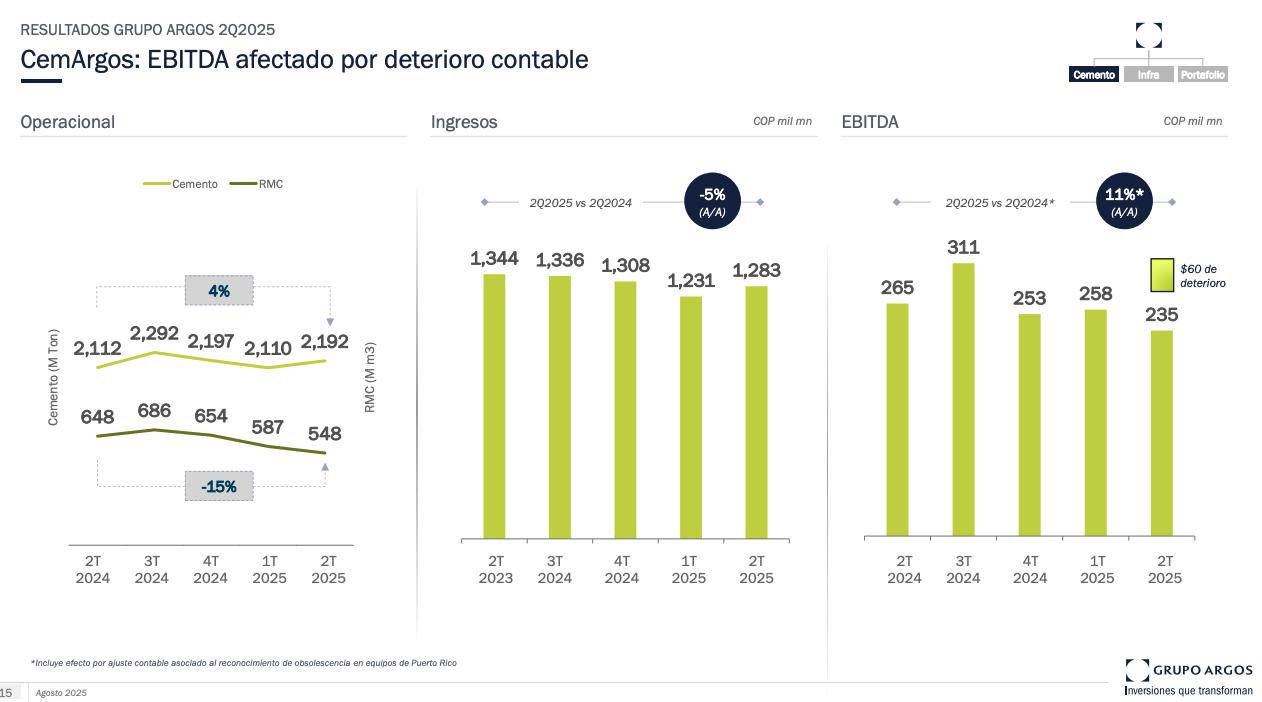



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 2 ---
Prompt: <image>
Convert the document to markdown.

Markdown Result:


# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

\[\begin{align*}
\text{2Q2025 vs 2Q2024} & \\
\text{2,112} & \\
\text{2,292} & \\
\text{2,197} & \\
\text{2,110} & \\
\text{2,192} & \\
\text{648} & \\
\text{686} & \\
\text{654} & \\
\text{587} & \\
\text{-15\%} & \\
\end{align*}\]

- **2,5\%**
- **-5\%**

### Ingresos

\[\begin{align*}
\text{2Q2025 vs 2Q2024} & \\
1,344 & \\
1,336 & \\
1,308 & \\
1,231 & \\
1,283 & \\
\end{align*}\]

- **2Q2025 vs 2Q2024\***

\[\begin{align*}
\text{2T} & \\
\text{2024} & \\
\text{2T} & \\
\text{2025} & \\
\end{align*}\]

- **311**
- **265**
- **253**
- **258**
- **235**

### EBITDA

\[\begin{align*}
\text{2T} & \\
\text{2024} & \\
\text{-11\%} & \\
\text{2T} & \\
\text{2025} & \\
\end{align*}*\]

- **260 de deterioro**

---

*Incluye efecto por ajuste contable asociado al reconocimiento de obsolescencia en equipos de Puerto Rico*

---

**GRUPO ARGOS**

Inversiones que transforman


Image with Bounding Boxes:


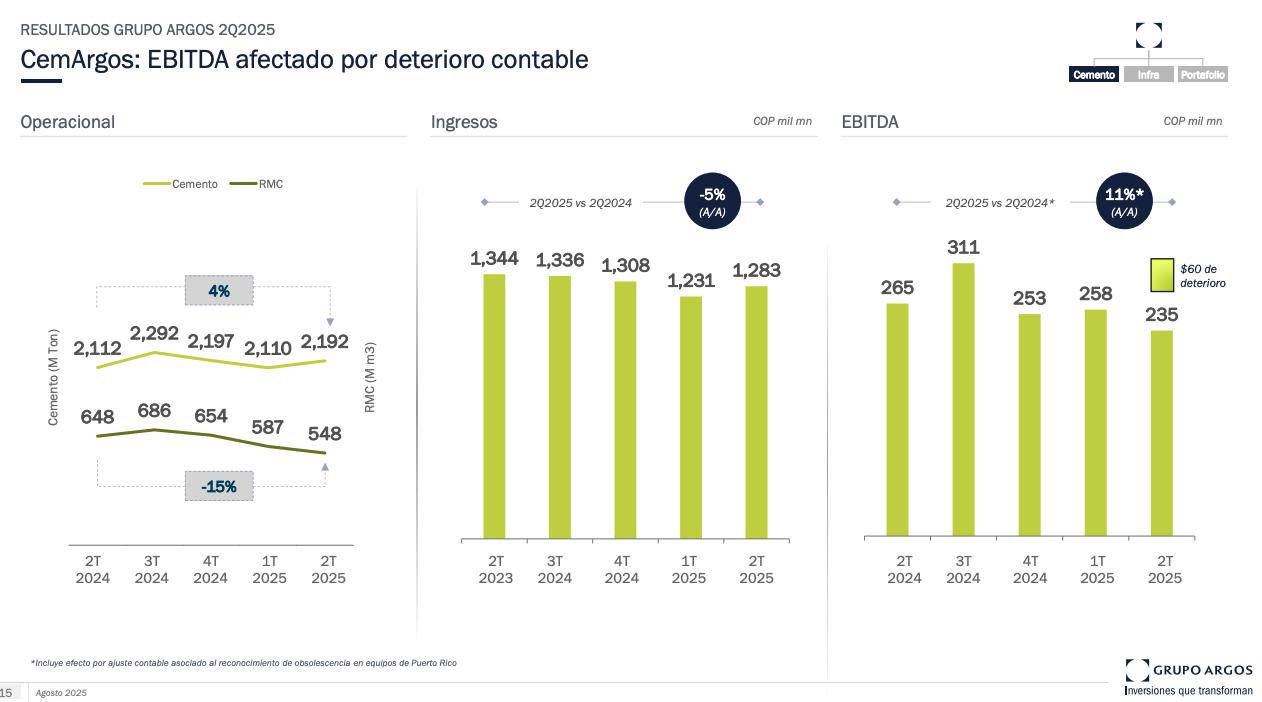



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 3 ---
Prompt: <image>
Parse the figure.

Markdown Result:


The image displays a bar chart titled "RESULTADOS GRUPO ARGOS 2022" with the subtitle "Flujo de Caja Acumulado." The chart is divided into two main sections, each with a series of horizontal bars representing different financial metrics.

On the left side, the chart is labeled "Flujo de Caja" and includes six categories: "Dividendos netos," "Ingresos NDU," "Compra/venta acciones," "Egresos GA," "Egresos NDU," and "Impuestos." Each category has a corresponding bar indicating the amount of money in millions of euros. The bars are colored in shades of blue and gray, with the darkest blue representing the highest amount and the lightest gray representing the lowest.

On the right side, the chart is labeled "Notas" and includes a note explaining the data sources and the methodology used to calculate the metrics. It mentions that the data is based on the 2022 financial year and that the figures are rounded to the nearest million euros.

Below the chart, there is a legend that correlates the colors of the bars with the categories listed above. The chart is set against a white background with a grid pattern, and the text is primarily in black with some blue highlights. The overall layout is clean and organized, making it easy to read and understand the financial data presented.


Image with Bounding Boxes:


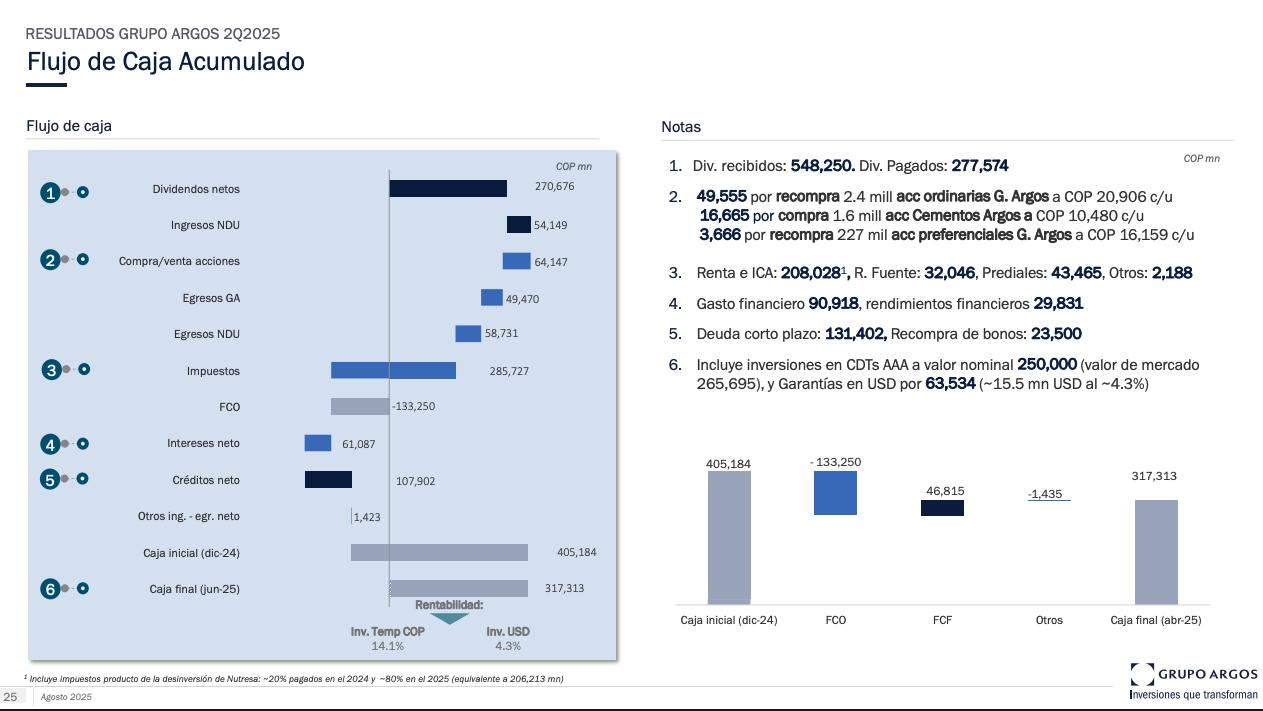



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 4 ---
Prompt: <image>
identify all objects in the image and output them in bounding boxes.

Markdown Result:



Image with Bounding Boxes:


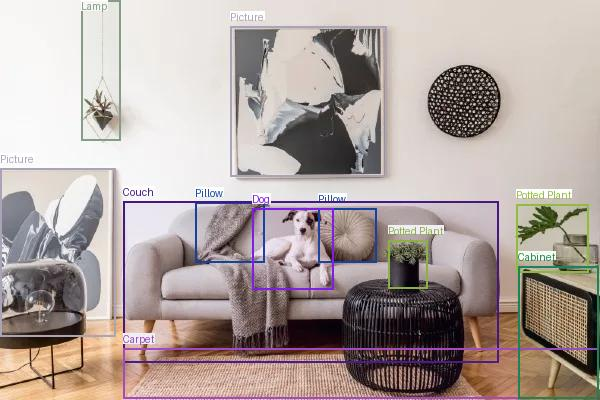



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 5 ---
Prompt: <image>
Locate <|ref|> icecream <|/ref|> in the image.

Markdown Result:



Image with Bounding Boxes:


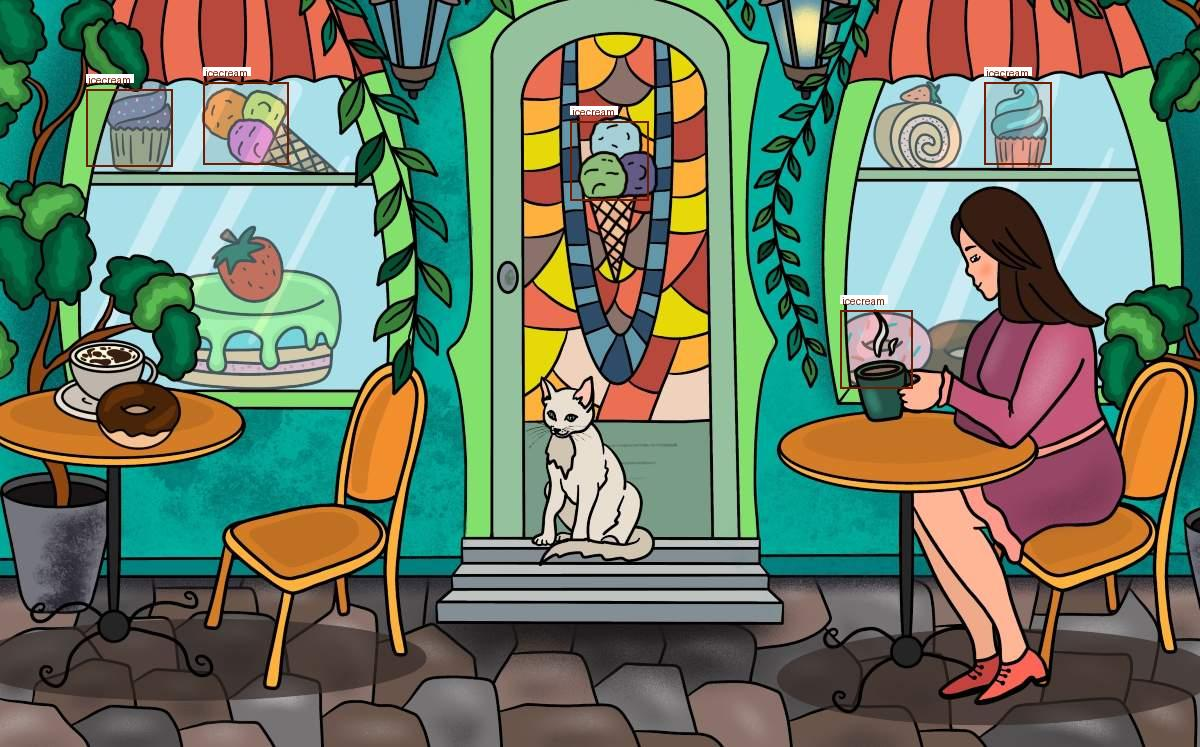



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 6 ---
Prompt: <image>
Locate <|ref|> X=6 <|/ref|> in the image.

Markdown Result:



Image with Bounding Boxes:


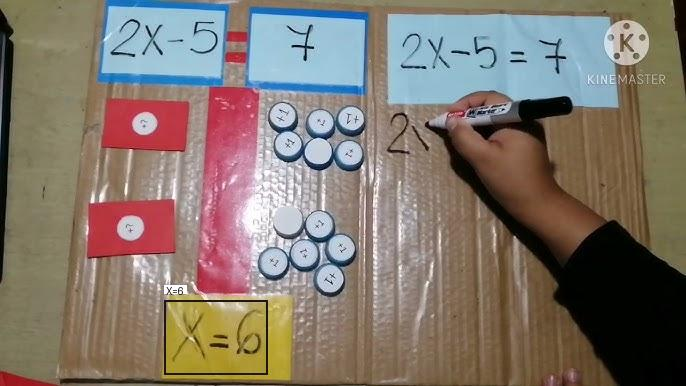



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 7 ---
Prompt: <image>
Describe this image in detail.

Markdown Result:


A candlestick chart of the EUR/USD currency pair. The chart is in a downtrend, and the price is currently testing a support level at 1.0000. There are two possible scenarios that could cause the price to break out of the downtrend. The first scenario is if the price breaks above the resistance level at 1.0000, which would indicate that buyers have taken control of the market. The second scenario is if the price breaks below the support level at 1.0000, which would indicate that sellers have taken control of the market. The image is a screenshot of a trading platform, and the font used is a sans-serif font. The style of the image is technical analysis.


Image with Bounding Boxes:


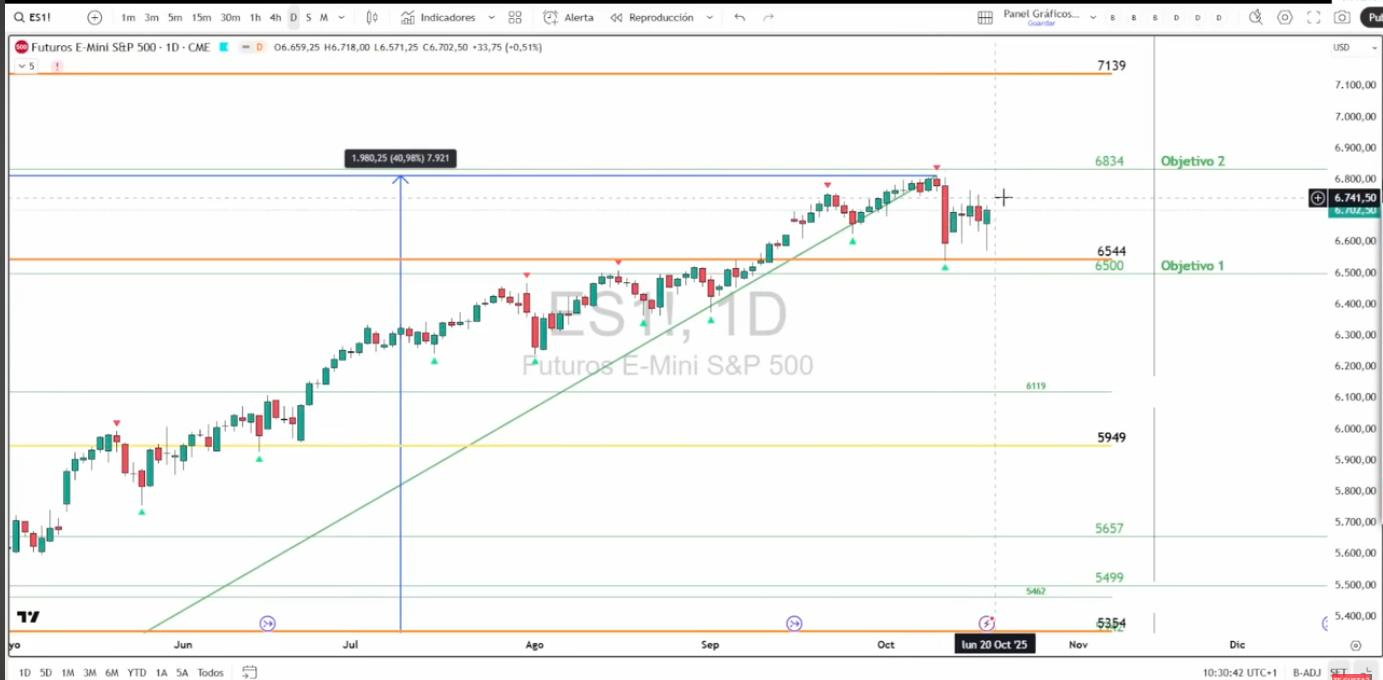

In [20]:
from IPython.display import display, Markdown, Image
import os

for i, result in enumerate(inference_results):
    print("\n")
    print("------"*20)
    print(f"\n--- Results for Inference {i+1} ---")
    print(f"Prompt: {result['prompt']}") # Display the prompt
    output_path = result['output_path']

    # Construct paths for markdown and image files
    markdown_file_path = os.path.join(output_path, 'result.mmd')
    image_file_path = os.path.join(output_path, 'result_with_boxes.jpg')

    # Display markdown content
    print("\nMarkdown Result:")
    try:
        with open(markdown_file_path, 'r') as f:
            markdown_content = f.read()
        display(Markdown(markdown_content))
    except FileNotFoundError:
        print(f"Error: The markdown file was not found at {markdown_file_path}")
    except Exception as e:
        print(f"An error occurred while reading the markdown file: {e}")

    # Display image with bounding boxes
    print("\nImage with Bounding Boxes:")
    try:
        display(Image(filename=image_file_path))
    except FileNotFoundError:
        print(f"Error: The image file was not found at {image_file_path}")
    except Exception as e:
        print(f"An error occurred while displaying the image: {e}")

In [ ]:
# infer(self, tokenizer, prompt='', image_file='', output_path = ' ', base_size = 1024, image_size = 640, crop_mode = True, test_compress = False, save_results = False):

# Tiny: base_size = 512, image_size = 512, crop_mode = False
# Small: base_size = 640, image_size = 640, crop_mode = False
# Base: base_size = 1024, image_size = 1024, crop_mode = False
# Large: base_size = 1280, image_size = 1280, crop_mode = False

# Gundam: base_size = 1024, image_size = 640, crop_mode = True


In [ ]:
# infer(self, tokenizer, prompt='', image_file='', output_path = ' ', base_size = 1024, image_size = 640, crop_mode = True, test_compress = False, save_results = False):

# Tiny: base_size = 512, image_size = 512, crop_mode = False
# Small: base_size = 640, image_size = 640, crop_mode = False
# Base: base_size = 1024, image_size = 1024, crop_mode = False
# Large: base_size = 1280, image_size = 1280, crop_mode = False

# Gundam: base_size = 1024, image_size = 640, crop_mode = True
